<a href="https://colab.research.google.com/github/zeniaharoon/KineXAI/blob/main/wearable_tech_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
test_file_path = "/content/drive/MyDrive/test.txt"

In [4]:
column_names = ['time_index', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']
data = pd.read_csv(test_file_path, delimiter=';', names=column_names, skiprows=1)

In [5]:
print(data.head())

   time_index     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
0           1 -3.588253 -5.197366  7.522436  0.007070 -0.002941 -0.017280   
1           2 -3.580792 -5.227365  7.544899 -0.003919 -0.013555 -0.008281   
2           3 -3.550748 -5.197726  7.575376 -0.005795 -0.002669 -0.000981   
3           4 -3.550756 -5.190177  7.552979 -0.006499  0.013241 -0.011727   
4           5 -3.573256 -5.197489  7.537634 -0.018393  0.011651  0.000059   

      mag_x     mag_y     mag_z  
0  0.611941  0.302945 -0.384226  
1  0.611887  0.303767 -0.384793  
2  0.611562  0.304314 -0.385364  
3  0.611572  0.304313 -0.385226  
4  0.612632  0.304858 -0.383828  


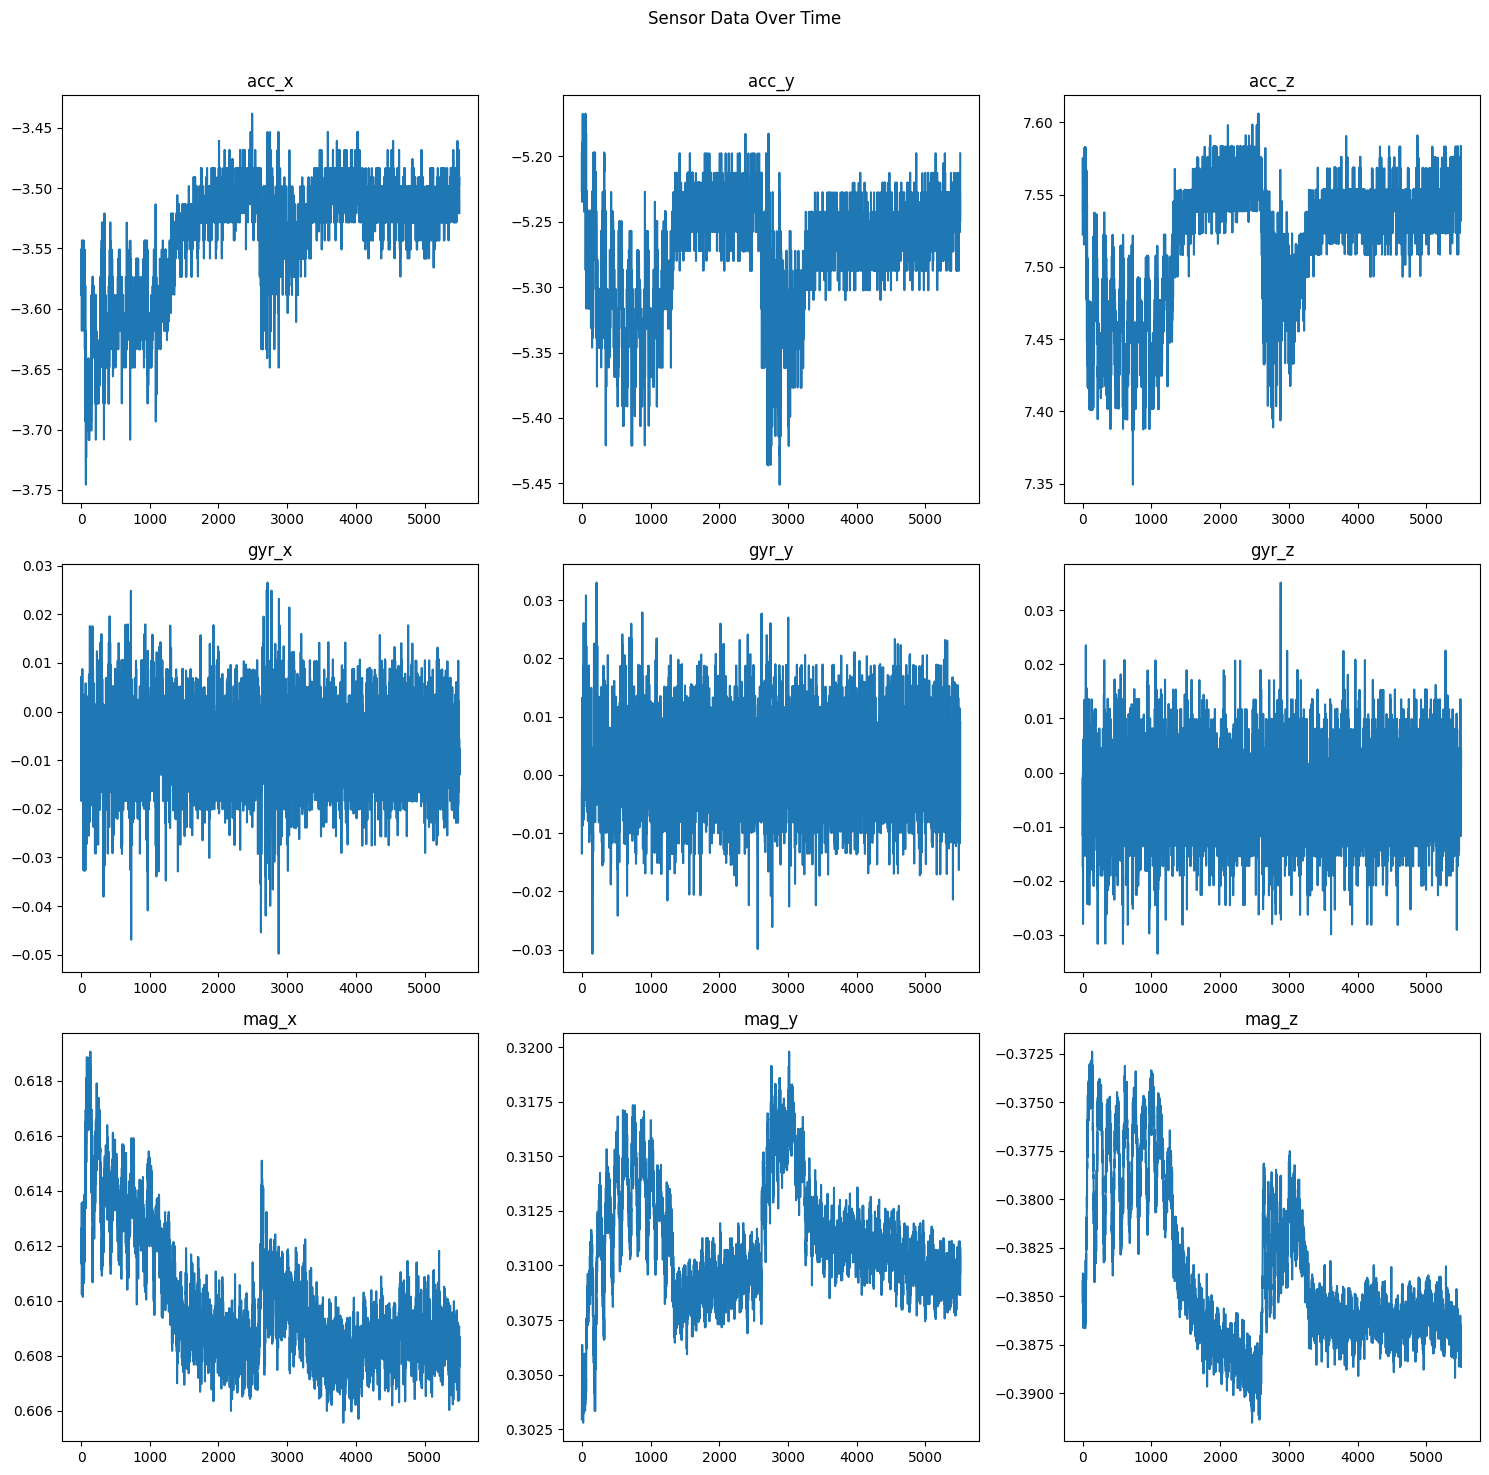

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Sensor Data Over Time')

axs[0, 0].plot(data['acc_x'])
axs[0, 0].set_title('acc_x')
axs[0, 1].plot(data['acc_y'])
axs[0, 1].set_title('acc_y')
axs[0, 2].plot(data['acc_z'])
axs[0, 2].set_title('acc_z')

axs[1, 0].plot(data['gyr_x'])
axs[1, 0].set_title('gyr_x')
axs[1, 1].plot(data['gyr_y'])
axs[1, 1].set_title('gyr_y')
axs[1, 2].plot(data['gyr_z'])
axs[1, 2].set_title('gyr_z')

axs[2, 0].plot(data['mag_x'])
axs[2, 0].set_title('mag_x')
axs[2, 1].plot(data['mag_y'])
axs[2, 1].set_title('mag_y')
axs[2, 2].plot(data['mag_z'])
axs[2, 2].set_title('mag_z')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [7]:
acc_x_dm= data["acc_x"] - data["acc_x"].mean()
acc_y_dm= data["acc_y"] - data["acc_y"].mean()
acc_z_dm= data["acc_z"] - data["acc_z"].mean()

gyr_x_dm= data["gyr_x"] - data["gyr_x"].mean()
gyr_y_dm= data["gyr_y"] - data["gyr_y"].mean()
gyr_z_dm= data["gyr_z"] - data["gyr_z"].mean()

mag_x_dm= data["mag_x"] - data["mag_x"].mean()
mag_y_dm= data["mag_y"] - data["mag_y"].mean()
mag_z_dm= data["mag_z"] - data["mag_z"].mean()

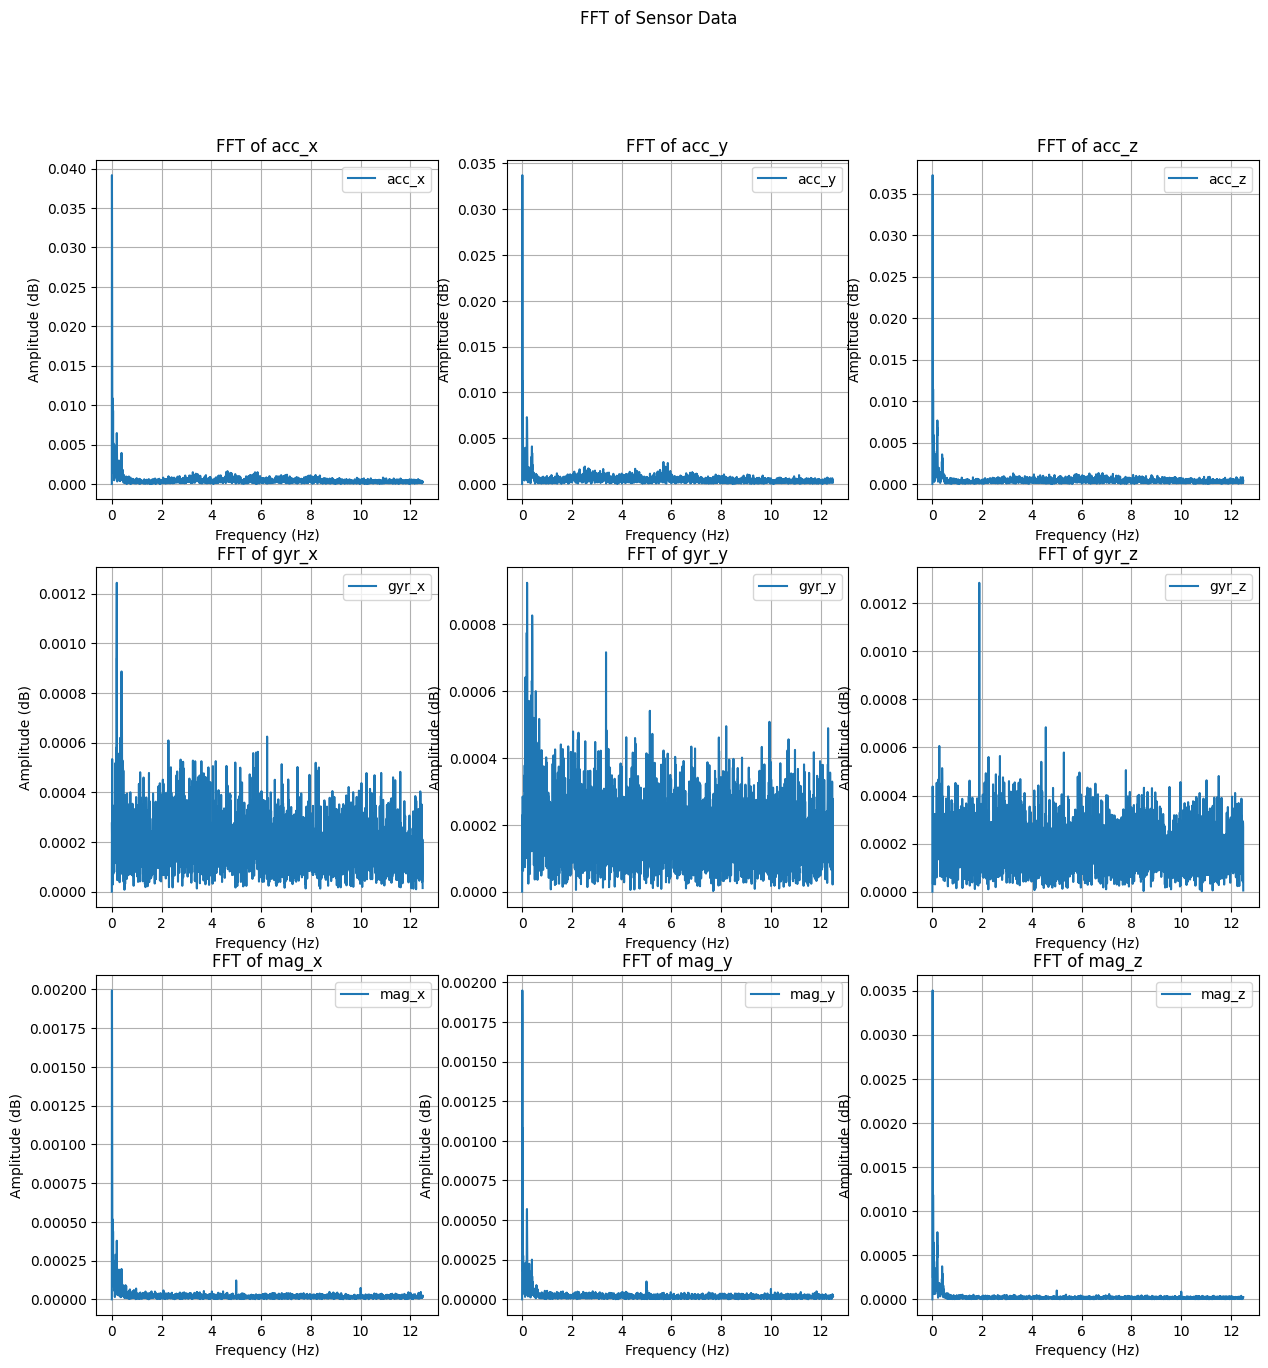

<Figure size 1500x1000 with 0 Axes>

In [8]:
def plot_fft(ax, data, sampling_rate, sensor_name):
    N = len(data)
    T = 1.0 / sampling_rate
    yf = np.fft.fft(data)
    xf = np.fft.fftfreq(N, T)[:N//2]
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]), label=sensor_name)
    ax.set_title(f'FFT of {sensor_name}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude (dB)')
    ax.legend()
    ax.grid()

sampling_rate = 25

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('FFT of Sensor Data')

plt.figure(figsize=(15, 10))
plot_fft(axs[0, 0], acc_x_dm, sampling_rate, 'acc_x')
plot_fft(axs[0, 1], acc_y_dm, sampling_rate, 'acc_y')
plot_fft(axs[0, 2], acc_z_dm, sampling_rate, 'acc_z')

plot_fft(axs[1, 0], gyr_x_dm, sampling_rate, 'gyr_x')
plot_fft(axs[1, 1], gyr_y_dm, sampling_rate, 'gyr_y')
plot_fft(axs[1, 2], gyr_z_dm, sampling_rate, 'gyr_z')

plot_fft(axs[2, 0], mag_x_dm, sampling_rate, 'mag_x')
plot_fft(axs[2, 1], mag_y_dm, sampling_rate, 'mag_y')
plot_fft(axs[2, 2], mag_z_dm, sampling_rate, 'mag_z')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

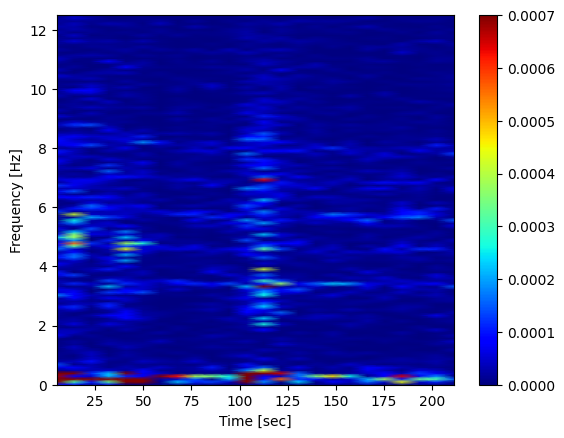

In [9]:
f_acc_x, t_acc_x, Sxx_acc_x = signal.spectrogram(acc_x_dm, sampling_rate)
final_acc_x = pd.DataFrame(Sxx_acc_x).iloc[:,0:Sxx_acc_x.shape[1]].mean(axis = 1)
plt.pcolormesh(t_acc_x, f_acc_x, Sxx_acc_x, shading='gouraud', cmap = plt.cm.jet, vmin = 0, vmax = 0.0007)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

In [10]:
test_file_path = "/content/drive/MyDrive/test.txt"
column_names = ['time_index', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']
data = pd.read_csv(test_file_path, delimiter=';', names=column_names, skiprows=1)

In [16]:
directory_path = f'/content/drive/MyDrive/physical therapy data/'

spectrograms = []

def calculate_spectrogram(data, sampling_rate):
    Sxx = signal.spectrogram(data, sampling_rate)
    return Sxx



for i in range(1, 40):
    file_path = os.path.join(directory_path, f'test ({i}).txt')

    column_names = ['time_index', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']
    data = pd.read_csv(file_path, delimiter=';', names=column_names, skiprows=1)
    acc_x_dm= data["acc_x"] - data["acc_x"].mean()

    Sxx_acc_x = calculate_spectrogram(acc_x_dm, sampling_rate)

    spectrograms = np.vstack((spectrograms, Sxx_acc_x))



print(combined_spectrogram_matrix.shape)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [ ]:
print(Sxx_acc_x)


[[9.11201570e-05 8.98990565e-05 1.89356643e-05 ... 1.06801795e-05
  2.41174167e-06 6.12749170e-09]
 [4.00560623e-03 3.01369701e-04 1.01466105e-04 ... 4.52100900e-05
  1.14016759e-04 3.32448338e-06]
 [8.35845080e-03 5.17596827e-03 2.41614334e-03 ... 3.31123245e-04
  3.08639420e-04 1.42361422e-04]
 ...
 [2.11209394e-05 1.20215416e-05 1.12765832e-05 ... 1.46462961e-05
  1.15037937e-05 4.11170328e-07]
 [2.82986180e-06 4.87264347e-05 2.45671353e-05 ... 3.28581152e-07
  1.07594456e-05 6.13575888e-06]
 [4.98668838e-06 1.76118248e-05 3.03714038e-06 ... 8.13174944e-06
  5.72205675e-07 4.14493091e-07]]
